In [88]:
# Goal: plot HK abudance by taxon

# import relevant packages, etc.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pp
from axes_style import set_axes_style, set_axes_height

# set standard axes styles
set_axes_style()
figWidth = 4
figHeight = 3

#save lists of colors
colors = ['#ed7e7e', '#f5e17f', '#6a9fe6', '#8decfc', '#63a68d', '#ce90f0', '#f5ab62', '#fa41a1', '#ce90f0', '#06c961',
         '#95c5db', '#abf5bd', '#e069c1', '#06c961', '#8decfc', '#f5e17f', '#8decfc', '#06c961', '#3980fa', '#95c5db',
         '#f5e17f', '#95c5db']
gray_scale = ['#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4',
              '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4',
              '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4']

In [89]:
# Import data
df1 = pd.read_csv("/Users/emilyfulk/Desktop/DeMMO data/022522_fig3.csv")

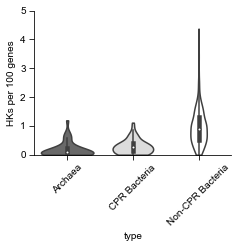

In [90]:
# make violin plot for CPR vs Archaea vs General HKs using Seaborn package 
# scale = count means that the width of the violins is scaled to how many sequences are found at each site/violin
# cut = 0 means that the range of the violin is the range of the observed data (not extending the probability density)

figA = pp.figure(figsize=(figWidth, figHeight))
ax_HK = pp.subplot(1,1,1)

ax_HK = sns.violinplot(y="HK_per_100_genes", x="type", data=df1, palette=['#696969','#DCDCDC','#FFFFFF'], cut=0)

# set the x axis to cut off at 0
ax_HK.set_ylim(0,5)

# label y axis
ax_HK.set_ylabel("HKs per 100 genes")

# set xtick labels
locs = ax_HK.get_xticks()
ax_HK.set_xticks(locs,labels=['Archaea','CPR Bacteria','Non-CPR Bacteria'],rotation=45)

# remove the right and top borders (but not the axes)
ax_HK.spines['right'].set_visible(False)
ax_HK.spines['top'].set_visible(False)

# Set axes style
set_axes_height(ax_HK,2)

# Export image as svg
fileouta = 'all_violin.svg'
pp.savefig(fileouta, bbox_inches="tight")

In [91]:
## Parse data
gen = df1[df1["type"] =="gen"]

# trim the number of phyla shown in the plot so it's not as overwhelming.
# Include phyla only if their relative percentage is 0.5% or higher

#calculate relative percentages for all general phyla 
perc = gen["phylum"].value_counts(normalize = True)

#make the percentages into a dataframe and make a list of phyla > 0.5%
gen_perc = pd.DataFrame(data = perc)
gen_perc = gen_perc.reset_index()
gen_perc = gen_perc.rename(columns={"index": "phylum", "phylum": "rel_perc"})
trimmed = gen_perc[gen_perc["rel_perc"] > 0.005]
trimmed_list = trimmed["phylum"].tolist()

# make new dataframe of phyla > 0.5% with all the relevant information
gen_red = gen[gen["phylum"].isin(trimmed_list)]

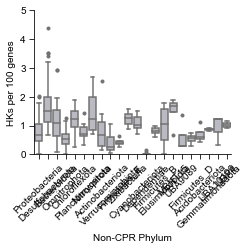

In [92]:
# make box plot for non-CPR bacteria

figB = pp.figure(figsize=(figWidth, figHeight))
ax_HK3 = pp.subplot(1,1,1)

# save list of phyla
phyla_order=["Proteobacteria", "Desulfobacterota","Bacteroidota","Omnitrophota","Chloroflexota",
                           "Planctomycetota","Nitrospirota","Actinobacteriota","Verrucomicrobiota","Firmicutes_E",
                           "Zixibacteria","Cyanobacteriota","Dependentiae","Firmicutes_B","Elusimicrobiota","MBNT15",
                           "UBA9089","Firmicutes_D","Acidobacteriota","Gemmatimonadota","UBA10199","UBP1"]

ax_HK3 = sns.boxplot(y="HK_per_100_genes", x="phylum", data=gen_red,
                     order=phyla_order, palette = gray_scale,
                    flierprops = dict(marker = 'o', markersize = 3))
            
# set the y axis limits
ax_HK3.set_ylim(0,5)

# label axes if not labeled already
ax_HK3.set_ylabel("HKs per 100 genes")
ax_HK3.set_xlabel("Non-CPR Phylum")

locs = ax_HK3.get_xticks()
ax_HK3.set_xticks(locs,labels=phyla_order,rotation=45)

# remove the right and top borders (but not the axes)
ax_HK3.spines['right'].set_visible(False)
ax_HK3.spines['top'].set_visible(False)

set_axes_height(ax_HK3,2)
fileoutb = 'bacteria_boxplot.svg'
pp.savefig(fileoutb, bbox_inches="tight")

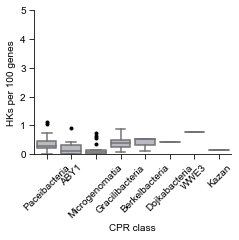

In [93]:
figC = pp.figure(figsize=(figWidth, figHeight))
ax_HK4 = pp.subplot(1,1,1)

cpr = df1[df1["type"] =="cpr"]

cpr_perc = cpr["class"].value_counts(normalize = True)

# make the CPR class plot
# color = ['#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4']

cpr_order = ["Paceibacteria","ABY1","Microgenomatia", "Gracilibacteria", "Berkelbacteria","Dojkabacteria","WWE3","Kazan"]

ax_HK4 = sns.boxplot(y="HK_per_100_genes", x="class", data=cpr, order=cpr_order,
                    color = '#b9b9c4', flierprops = dict(marker = 'o', markersize = 3, markerfacecolor = 'black', 
                                                      markeredgecolor = 'black'))


# set the y axis limits
ax_HK4.set_ylim(0,5)

# label axes
ax_HK4.set_ylabel("HKs per 100 genes")
ax_HK4.set_xlabel("CPR class")

locs = ax_HK4.get_xticks()
ax_HK4.set_xticks(locs,labels=cpr_order,rotation=45)

# remove the right and top borders (but not the axes)
ax_HK4.spines['right'].set_visible(False)
ax_HK4.spines['top'].set_visible(False)

# set axes style and save figure
set_axes_height(ax_HK4,2)
fileoutc = 'CPR_boxplot.svg'
pp.savefig(fileoutc, bbox_inches="tight")

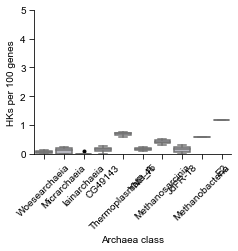

In [96]:
figD = pp.figure(figsize=(figWidth, figHeight))
ax_HK5 = pp.subplot(1,1,1)


arch = df1[df1["type"] =="arch"]

arch_perc = arch["class"].value_counts(normalize = True)

archaea_order = ["Woesearchaeia","Micrarchaeia","Iainarchaeia","CG49143","Thermoplasmata_A","YNP-45","Methanosarcinia","JdFR-18","Methanobacteria","E2"]

# make the archaea class plot
ax_HK5 = sns.boxplot(y="HK_per_100_genes", x="class", data=arch, order=archaea_order,
                    color = '#b9b9c4', flierprops = dict(marker = 'o', markersize = 3, markerfacecolor = 'black', 
                                                      markeredgecolor = 'black'))


# set y axis limits
ax_HK5.set_ylim(0,5)

# label axes
ax_HK5.set_ylabel("HKs per 100 genes")
ax_HK5.set_xlabel("Archaea class")

locs = ax_HK5.get_xticks()
ax_HK5.set_xticks(locs,labels=archaea_order,rotation=45)

# remove the right and top borders (but not the axes)
set_axes_height(ax_HK5,2)
ax_HK5.spines['right'].set_visible(False)
ax_HK5.spines['top'].set_visible(False)

fileoutd = 'archaea_boxplot.svg'
pp.savefig(fileoutd, bbox_inches="tight")